### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

#### First of all, we clean and prepare data for further analysis. In the following, we clean data for Ireland's dataset.

In [2]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\ireland.csv'
ireland_df = pd.read_csv(file_path, delimiter='\t')

In [3]:
print("Ireland Dataset Info:")
print(ireland_df.info())

Ireland Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        120 non-null    object
 1   Statistic Label  120 non-null    object
 2   TLIST(A1)        120 non-null    int64 
 3   Year             120 non-null    int64 
 4   C02639V03196     120 non-null    object
 5   Days of Week     120 non-null    object
 6   UNIT             120 non-null    object
 7   VALUE            120 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.6+ KB
None


In [4]:
ireland_df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196',
       'Days of Week', 'UNIT', 'VALUE'],
      dtype='object')

In [5]:
print(ireland_df.head())

  STATISTIC        Statistic Label  TLIST(A1)  Year C02639V03196 Days of Week  \
0  TOA02C01  Average Red Line Flow       2018  2018            -     All days   
1  TOA02C01  Average Red Line Flow       2018  2018            1       Sunday   
2  TOA02C01  Average Red Line Flow       2018  2018            2       Monday   
3  TOA02C01  Average Red Line Flow       2018  2018            3      Tuesday   
4  TOA02C01  Average Red Line Flow       2018  2018            4    Wednesday   

     UNIT   VALUE  
0  Number  419947  
1  Number   34860  
2  Number   60673  
3  Number   65632  
4  Number   67364  


In [6]:
ireland_df = ireland_df.dropna()
ireland_df = ireland_df.drop_duplicates()
ireland_df.columns = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196', 'Days of Week', 'UNIT', 'VALUE']
ireland_df['Year'] = pd.to_numeric(ireland_df['Year'], errors='coerce')
ireland_df['VALUE'] = pd.to_numeric(ireland_df['VALUE'], errors='coerce')
print("\nCleaned Ireland Dataset:")
ireland_df.to_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv', index=False)


Cleaned Ireland Dataset:


#### The following code shows the cleaning process for Australia's dataset.

In [7]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\australia.csv'

In [8]:
column_dtype = {'TripID': str}

In [9]:
# Specify dtype and low_memory parameters to address DtypeWarning
aus_df = pd.read_csv(file_path,  dtype = column_dtype, low_memory=False)
print("Original Australia Dataset Info:")
print(aus_df.info())

Original Australia Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  object
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None


In [10]:
aus_df['WeekBeginning'] = pd.to_datetime(aus_df['WeekBeginning'], errors='coerce')
aus_df = aus_df.dropna()
aus_df = aus_df.drop_duplicates()

In [11]:
print("\nCleaned Australia Dataset:")
print(aus_df.head())


Cleaned Australia Dataset:
  TripID RouteID  StopID                    StopName WeekBeginning  \
0  23631     100   14156                181 Cross Rd    2013-06-30   
1  23631     100   14144                177 Cross Rd    2013-06-30   
2  23632     100   14132                175 Cross Rd    2013-06-30   
3  23633     100   12266  Zone A Arndale Interchange    2013-06-30   
4  23633     100   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1  


In [12]:
cleaned_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv'
aus_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv


#### To visualize the datasets, we implement the following code for both datasets.

In [13]:
#Load the Australian dataset with specified data types
aus_dtype = {'RouteID': 'object', 'StopID': 'object', 'NumberOfBoardings': 'int'}
aus_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv', dtype=aus_dtype, parse_dates=['WeekBeginning'], low_memory=False)

In [14]:
# Load the Ireland dataset
ireland_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv')

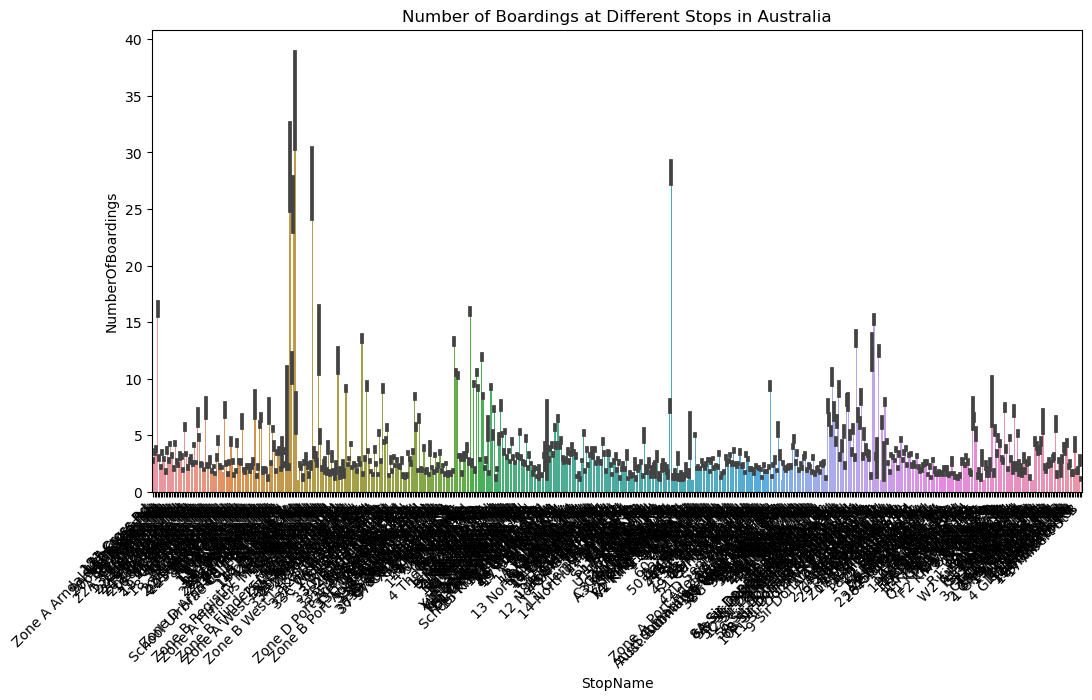

In [15]:
# Visualize the Australian dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='StopName', y='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings at Different Stops in Australia')
plt.xticks(rotation=45, ha='right')
plt.show()

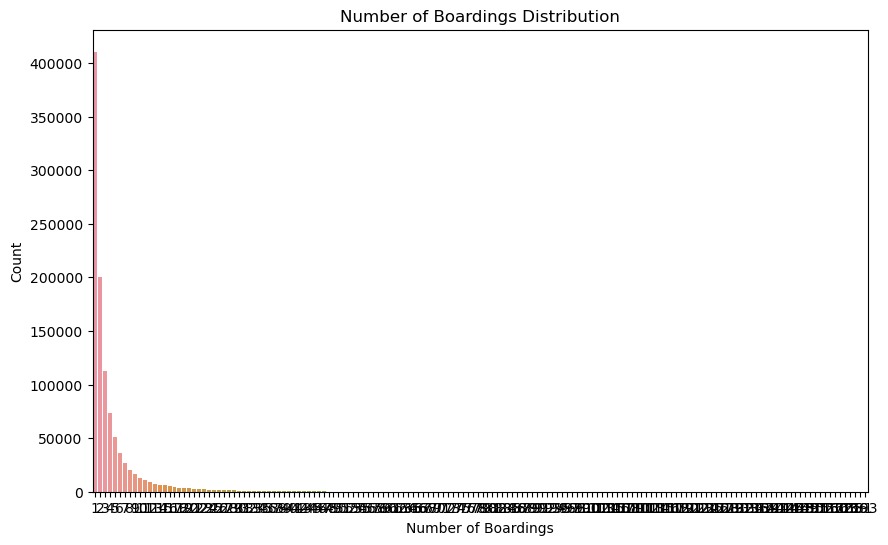

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings Distribution')
plt.xlabel('Number of Boardings')
plt.ylabel('Count')
plt.show()

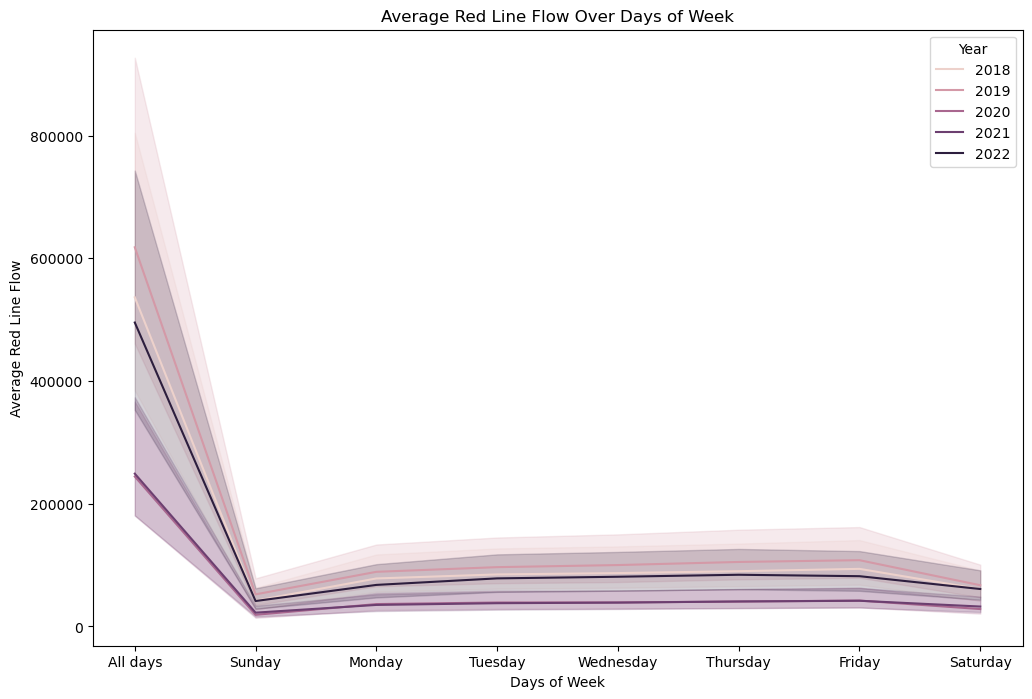

In [17]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Days of Week', y='VALUE', hue='Year', data=ireland_df)
plt.title('Average Red Line Flow Over Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Average Red Line Flow')
plt.show()

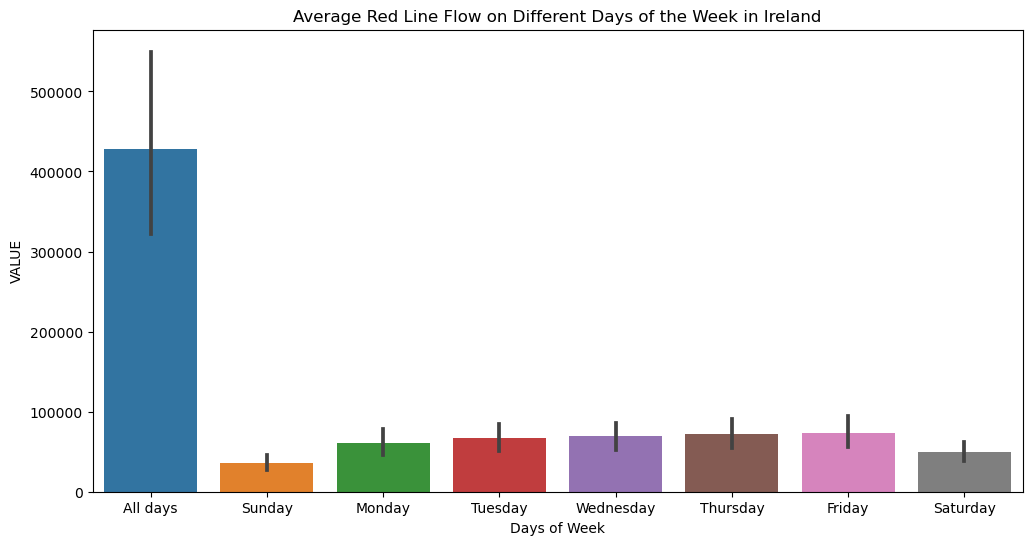

In [18]:
# Visualize the Ireland dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Days of Week', y='VALUE', data=ireland_df)
plt.title('Average Red Line Flow on Different Days of the Week in Ireland')
plt.show()

#### Use descriptive statistics and appropriate visualizations in order to summarise the dataset(s) used, and to help justify the chosen models.

#### In the following code, descriptive statistics for datasets from Australia and Ireland are computed using pandas.
#### The 'RouteID' column in the Australian dataset is converted to numeric, and visualizations (histogram and boxplot) are added to summarize the Distribution of 'NumberOfBoardings' in Australia and 'VALUE' in Ireland, enhancing the understanding of key features in each dataset.

In [19]:
# File paths
aus_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv'
ireland_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv'

In [20]:
# Define data types for columns
aus_dtype = {'TripID': int, 'RouteID': str, 'StopID': int, 'StopName': str, 'WeekBeginning': str, 'NumberOfBoardings': int}
ireland_dtype = {'STATISTIC': str, 'Statistic Label': str, 'TLIST(A1)': int, 'Year': int, 'C02639V03196': str, 'Days of Week': str, 'UNIT': str, 'VALUE': int}

In [21]:
# Read datasets with specified data types
aus_df = pd.read_csv(aus_file_path, dtype=aus_dtype)
ireland_df = pd.read_csv(ireland_file_path, dtype=ireland_dtype)

In [22]:
# Convert 'RouteID' column to numeric, handling errors
aus_df['RouteID'] = pd.to_numeric(aus_df['RouteID'], errors='coerce')

# Descriptive statistics for the Australian dataset
aus_stats = aus_df.describe()

# Descriptive statistics for the Ireland dataset
ireland_stats = ireland_df.describe()

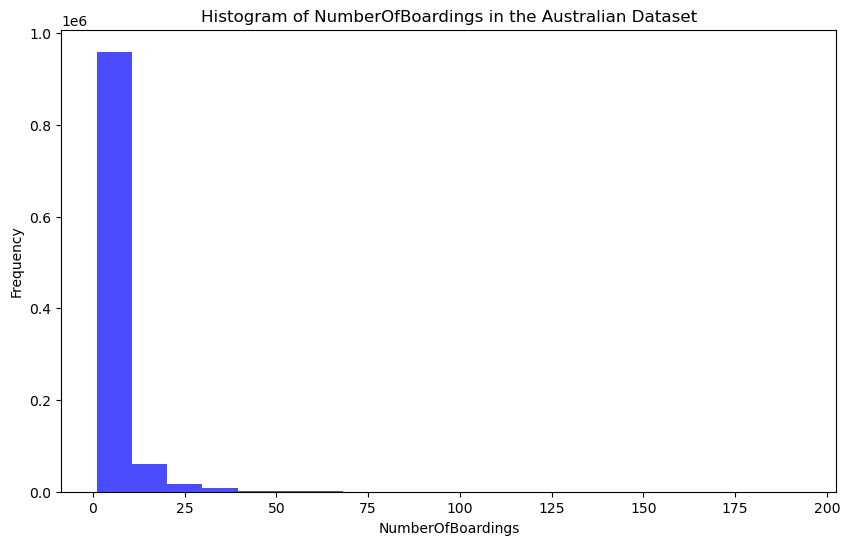

In [23]:
# Visualizations
# Histogram for 'NumberOfBoardings' in the Australian dataset
plt.figure(figsize=(10, 6))
plt.hist(aus_df['NumberOfBoardings'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of NumberOfBoardings in the Australian Dataset')
plt.xlabel('NumberOfBoardings')
plt.ylabel('Frequency')
plt.show()

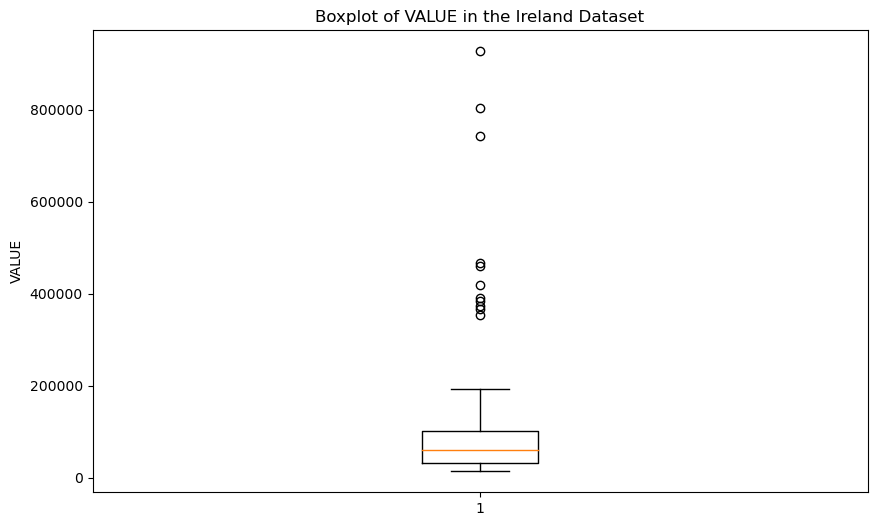

In [24]:
# Boxplot for 'VALUE' in the Ireland dataset
plt.figure(figsize=(10, 6))
plt.boxplot(ireland_df['VALUE'])
plt.title('Boxplot of VALUE in the Ireland Dataset')
plt.ylabel('VALUE')
plt.show()

In [28]:
# Print the results
print("Descriptive Statistics for the Australian Dataset:")
print(aus_stats)

Descriptive Statistics for the Australian Dataset:
             TripID       RouteID        StopID  NumberOfBoardings
count  1.048575e+06  1.008700e+06  1.048575e+06       1.048575e+06
mean   2.860299e+04  1.416927e+02  1.330114e+04       4.132290e+00
std    1.674656e+04  2.167957e+01  1.119243e+03       6.291338e+00
min    3.017000e+03  1.000000e+02  1.081700e+04       1.000000e+00
25%    1.162200e+04  1.180000e+02  1.269800e+04       1.000000e+00
50%    3.423400e+04  1.470000e+02  1.333500e+04       2.000000e+00
75%    4.512600e+04  1.570000e+02  1.371600e+04       4.000000e+00
max    6.258500e+04  1.710000e+02  1.849300e+04       1.930000e+02


In [26]:
print("\nDescriptive Statistics for the Ireland Dataset:")
print(ireland_stats)


Descriptive Statistics for the Ireland Dataset:
         TLIST(A1)         Year          VALUE
count   120.000000   120.000000     120.000000
mean   2020.000000  2020.000000  107147.350000
std       1.420143     1.420143  149100.252203
min    2018.000000  2018.000000   14165.000000
25%    2019.000000  2019.000000   32086.750000
50%    2020.000000  2020.000000   61104.000000
75%    2021.000000  2021.000000  100875.750000
max    2022.000000  2022.000000  926964.000000
